### Solução

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = random.uniform(-80, 80)
a = 10
print("Parameter 'a':", a)
n = 30


def objective_function(x):
    y = 0
    for i in range(30):
        y = y + math.pow(x[0]-a, 2)
    return y


bounds = [(-100, 100)]   # upper and lower bounds of variables
nv = len(bounds)          # number of variables
mm = -1                   # if minimization problem, mm = -1; if maximization problem, mm = 1


particle_size = 100         # number of particles
iterations = 20           # max number of iterations
w = 0.85                    # inertia constant
c1 = 1                    # cognative constant
c2 = 2                     # social constant

Parameter 'a': 10


In [3]:
psize10 = []
psize100 = []
psize1000 = []

In [4]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = []                     # particle position
        self.particle_velocity = []                     # particle velocity
        self.local_best_particle_position = []          # best position of the particle
        # initial objective function value of the best particle position
        self.fitness_local_best_particle_position = initial_fitness
        # objective function value of the particle position
        self.fitness_particle_position = initial_fitness

        for i in range(nv):
            # generate random initial position
            #self.particle_position.append(
                #random.uniform(bounds[i][0], bounds[i][1]))
            self.particle_position = [50.0]
            # generate random initial velocity
            self.particle_velocity.append(random.uniform(-1, 1))

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(
            self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                # update the local best
                self.local_best_particle_position = self.particle_position
                # update the fitness of the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                # update the local best
                self.local_best_particle_position = self.particle_position
                # update the fitness of the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()

            cognitive_velocity = c1*r1 * \
                (self.local_best_particle_position[i] -
                 self.particle_position[i])
            social_velocity = c2*r2 * \
                (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i] + \
                cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + \
                self.particle_velocity[i]

            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]


class PSO():
    def __init__(self, objective_function, bounds, particle_size, iterations):

        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []

        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))

        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)

                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(
                            swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(
                            swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(
                            swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(
                            swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(
                    global_best_particle_position)
                swarm_particle[j].update_position(bounds)

            # record the best fitness
            if(particle_size == 10):
                psize10.append(fitness_global_best_particle_position)
            elif(particle_size == 100):
                psize100.append(fitness_global_best_particle_position)
            elif(particle_size == 1000):
                psize1000.append(fitness_global_best_particle_position)

        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:',
              fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')

In [5]:
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
#PSO(objective_function, bounds, 100, iterations)

### Benchmark

Optimal solution: [10.431259233848582]
Objective function value: 5.579535803389984
Evolutionary process of the objective function value:
Optimal solution: [10.001453403935685]
Objective function value: 6.337149000790498e-05
Evolutionary process of the objective function value:
Optimal solution: [9.997600825750645]
Objective function value: 0.0001726811123630416
Evolutionary process of the objective function value:


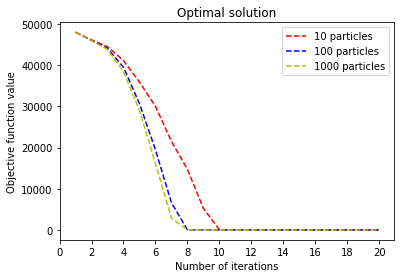

In [6]:
PSO(objective_function, bounds, 10, iterations)
PSO(objective_function, bounds, 100, iterations)
PSO(objective_function, bounds, 1000, iterations)
    
plt.plot(np.arange(1, len(psize10)+1),
             psize10, 'r--', label='10 particles')
plt.plot(np.arange(1, len(psize100)+1),
             psize100, 'b--', label='100 particles')
plt.plot(np.arange(1, len(psize1000)+1),
             psize1000, 'y--', label='1000 particles')
plt.title("Optimal solution")
plt.ylabel('Objective function value')
plt.xlabel('Number of iterations')
plt.xticks(np.arange(0, 21, step=2))
plt.legend()
plt.show()